# 실습 1. Wine Quality 분류 예측
1. 데이터: WineQualityN_imbalance.csv
2. 예측: Low, Hight Quality 이진 분류
3. 특징: 클래스 불균형 데이터
4. 목표: 클래스 불균형 기법을 이해하고 Accuray 향상

분균형 데이터 처리 방법  
- Under Sampling | 언더 샘플링
- Simple Over Sampling | 단순 오버 샘플링
- Algorithm Over Sampling | 알고리즘을 통한 오버샘플링(SMOTE, ADASYN)
- Cost-sensitive learning

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
wine = pd.read_csv('../data/winequalityN_imblance.csv')
wine.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_range
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [11]:
wine.shape

(6497, 13)

In [12]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed_acidity         6487 non-null   float64
 2   volatile_acidity      6489 non-null   float64
 3   citric_acid           6494 non-null   float64
 4   residual_sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality_range         6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [13]:
wine.isnull().sum()

type                     0
fixed_acidity           10
volatile_acidity         8
citric_acid              3
residual_sugar           2
chlorides                2
free_sulfur_dioxide      0
total_sulfur_dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality_range            0
dtype: int64

In [14]:
wine['quality_range'].value_counts()

1    6251
0     246
Name: quality_range, dtype: int64

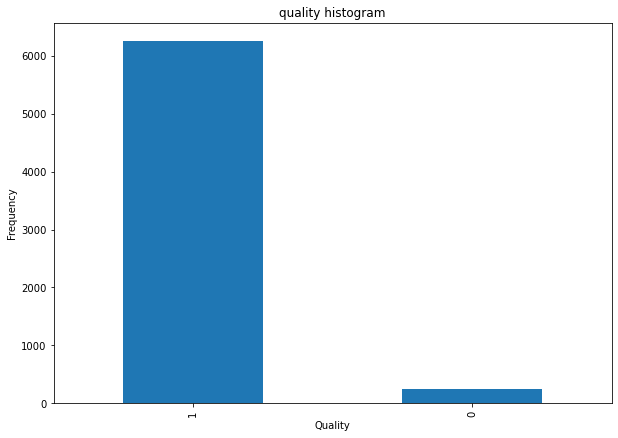

In [19]:
plt.figure(figsize=(10, 7))
pd.value_counts(wine['quality_range']).plot.bar()
plt.title('quality histogram')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

In [20]:
wine.dropna(axis=0, inplace = True)
wine.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_range
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [21]:
wine_cat = pd.get_dummies(wine['type'],drop_first=True)
df = pd.concat([wine.drop(['type'],axis=1),wine_cat], axis = 1 )
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_range,white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6463 non-null   float64
 1   volatile_acidity      6463 non-null   float64
 2   citric_acid           6463 non-null   float64
 3   residual_sugar        6463 non-null   float64
 4   chlorides             6463 non-null   float64
 5   free_sulfur_dioxide   6463 non-null   float64
 6   total_sulfur_dioxide  6463 non-null   float64
 7   density               6463 non-null   float64
 8   pH                    6463 non-null   float64
 9   sulphates             6463 non-null   float64
 10  alcohol               6463 non-null   float64
 11  quality_range         6463 non-null   int64  
 12  white                 6463 non-null   uint8  
dtypes: float64(11), int64(1), uint8(1)
memory usage: 662.7 KB


## Over sampling  
1. 무작위 추출: 무작위로 소수 데이터를 복제  
1. 유의정보: 사전에 기준을 정해서 소수 데이터를 복제  
1. 합성 데이터 생성: 소수 데이터를 단순 복제하는 것이 아니라 새로운 복제본을 생성

In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [24]:
X = np.array(df.drop(['quality_range'],axis=1))
y = np.array(df['quality_range'])
print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

Shape of X: (6463, 12)
Shape of y: (6463,)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    shuffle=False, 
                                                    random_state=1004)
print("Shape of X_train: {}".format(X_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (4524, 12)
Shape of y_train: (4524,)
Shape of X_test: (1939, 12)
Shape of y_test: (1939,)


In [26]:
print("Before OverSampling, counts of label'1':{}".format(sum(y_train==1)))
print("Before OverSampling, counts of label'0':{}\n".format(sum(y_train==0)))

sm = SMOTE(random_state = 10)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
print("Shape of X_train_res:{}".format(X_train_res.shape))
print("Shape of y_train_res:{}\n".format(y_train_res.shape))

print("After OverSampling, counts of label'1':{}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label'0':{}".format(sum(y_train_res==0)))

Before OverSampling, counts of label'1':4351
Before OverSampling, counts of label'0':173

Shape of X_train_res:(8702, 12)
Shape of y_train_res:(8702,)

After OverSampling, counts of label'1':4351
After OverSampling, counts of label'0':4351


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    
 
# 학습 진행
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train_res, y_train_res)
 
# 예측
y_pred = forest.predict(X_test)
 
# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

정확도 : 0.7328519855595668


## Under Sampling

In [28]:
 from imblearn.under_sampling import RandomUnderSampler

In [29]:
X_samp, y_samp = RandomUnderSampler(random_state=0).fit_resample(X_train, y_train)

# 학습 진행
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_samp, y_samp)
 
# 예측
y_pred = forest.predict(X_test)
 
# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

정확도 : 0.19546157813305828


## Tomek link  
토멕링크 방법론은 분포가 작은 클래스의 데이터에서 가장 가까운 분포가 높은 데이터의 위치를 찾는 것입니다. 즉, 서로 다른 클래스가 있을 때 서로 다른 클래스끼리 가장 가까운 데이터들이 토멕링크로 묶여서 토멕링크 중 분포가 높은 데이터를 제거하는 방법론입니다.  
토멕링크를 찾아서 제거하는 방법론이기 때문에 클래스를 나누는 TreshHold를 분포가 높은 쪽으로 밀어 붙이는 효과가 있습니다. 

In [30]:
 from imblearn.under_sampling import TomekLinks
    
X_Tomek, y_Tomek = TomekLinks().fit_resample(X_train, y_train)

forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_Tomek, y_Tomek)
 
# 예측
y_pred = forest.predict(X_test)
 
# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

정확도 : 0.629706034038164
